# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>

#### <center>__ALUNO:ISAAC ANTONIO SILVA BARBOSA__</center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>

PCA é um ferramenta matemática- que usa uma transformação ortogonal (ortogonalização de vetores) para trocar um conjunto de observações de variáveis possivelmente relacionadas em conjunto de valores de variáveis linearmente não relacionadas chamadas de componentes principais. No entanto todos esses métodos robustos ainda são limitados para dados de baixa dimensão e, portanto, eles não são convenientes com aplicações de visão computacional com dados de alta dimensão. A parte de plano de fundo é então configurada por um subespaço de baixa classificação que é capaz mudar gradualmente ao longo do tempo, sempre que os objetos em primeiro plano em movimento compõem os outliers esparsos correlacionados.

<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

A propósito do uso de PCA robusto, deve-se ao estudo sobre algoritmos para detecção de objetos em movimento em uma cena com fundo estático.
Tal capacidade, permite que os sistemas foquem a atenção nos objetos que estão em movimento e que possivelmente são cruciais na execução da tarefa para a qual foram programados.
A ideia da subtração de fundo é subtrair da imagem atual uma imagem de referência, a qual é adquirida e modelada a partir de um fundo estático durante certo período de tempo, o que é conhecido como tempo de treinamento.
alguns algoritmos exploram a dferença estatística e/ou probabilística de cor entre a imagem atual e a imagem de referência, a qual é treinada durante um período de tempo com base em um número determinado de imagens.
Outros baseiam-se na análise de movimento dos objetos, nas características das imagens em estéreo, em transformações logarítmicas e no aprendizado por markov e bayesianas.

<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

In [1]:
def create_data_matrix_from_video(clip, k=5, scale=50):
    return np.vstack([np.array(Image.fromarray(rgb2gray(clip.get_frame(i/float(k))).astype(np.uint8)).resize(scale)).flatten() 
                      for i in range(k * int(clip.duration))]).T

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3
                     ], [0.299, 0.587, 0.114])

In [3]:
def plt_images(M, A, E, index_array, dims, filename=None):
    f = plt.figure(figsize=(15, 10))
    r = len(index_array)
    pics = r * 3
    for k, i in enumerate(index_array):
        for j, mat in enumerate([M, A, E]):
            sp = f.add_subplot(r, 3, 3*k + j + 1)
            sp.axis('Off')
            pixels = mat[:,i]
            if isinstance(pixels, scipy.sparse.csr_matrix):
                pixels = pixels.todense()
            plt.imshow(np.reshape(pixels, dims), cmap='gray')
    return f

In [4]:
def plots(ims, dims, figsize=(15,20), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        plt.imshow(np.reshape(ims[i], dims), cmap="gray")

<div class="alert alert-block alert-info">
4. IMPLEMENTAÇÃO
</div>

In [5]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install moviepy

In [7]:
import moviepy.editor as mpe
from IPython.display import display
from glob import glob
from PIL import Image

In [8]:
import sys, os
import numpy as np
import scipy
import scipy.misc

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install fbpca

Note: you may need to restart the kernel to use updated packages.


In [12]:
# MAX_ITERS = 10
TOL = 1.0e-8

In [13]:
video = mpe.VideoFileClip("Downloads\projetoMN.MP4")

In [14]:
video.subclip(0,50).ipython_display(width=300)

t:   1%|▌                                                                    | 3/350 [00:00<00:11, 29.44it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [15]:
video.duration

50.0

<div class="alert alert-block alert-info">
5. CASOS DE USO
</div>

In [16]:
scale = 25   # Adjust scale to change resolution of image
dims = (int(240 * (scale/100)), int(320 * (scale/100)))

In [17]:
M = create_data_matrix_from_video(video, 226, (80,60))
# M = np.load("high_res_surveillance_matrix.npy")

In [18]:
print(dims, M.shape)

(60, 80) (4800, 11300)


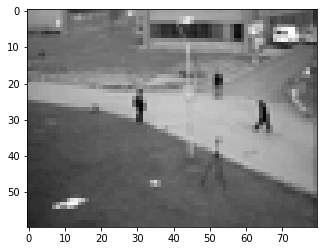

In [19]:
plt.imshow(np.reshape(M[:,140], dims), cmap='gray')

In [20]:
np.save("low_res_surveillance_matrix.npy", M)

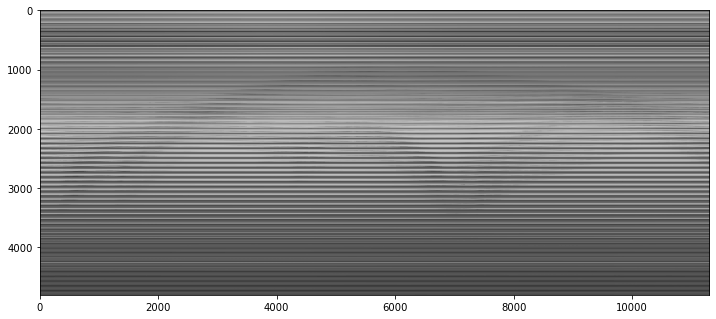

In [21]:
plt.figure(figsize=(12, 12))
plt.imshow(M, cmap='gray')

# SVD

In [22]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn import decomposition

In [24]:
u, s, v = decomposition.randomized_svd(M, 2)

In [25]:
u.shape, s.shape, v.shape

((4800, 2), (2,), (2, 11300))

In [26]:
low_rank = u @ np.diag(s) @ v

In [27]:
low_rank.shape

(4800, 11300)

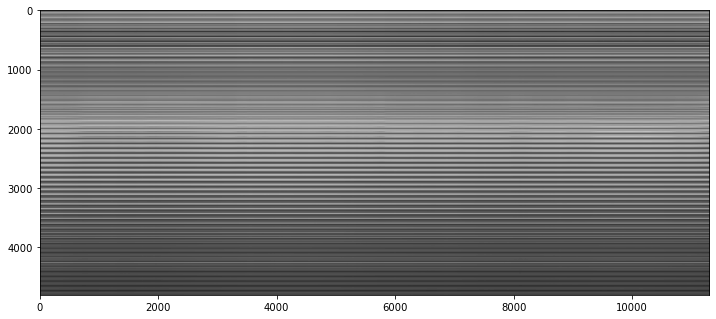

In [28]:
plt.figure(figsize=(12, 12))
plt.imshow(low_rank, cmap='gray')

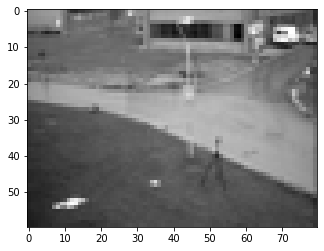

In [29]:
plt.imshow(np.reshape(low_rank[:,140], dims), cmap='gray');

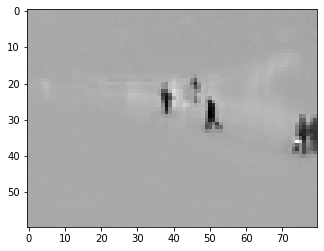

In [30]:
plt.imshow(np.reshape(M[:,550] - low_rank[:,550], dims), cmap='gray');

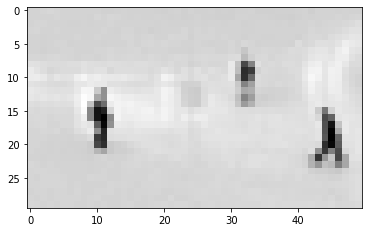

In [31]:
plt.imshow(np.reshape(M[:,140] - low_rank[:,140], dims)[10:40,20:70], cmap='gray');

In [32]:
pip install fbpca

Note: you may need to restart the kernel to use updated packages.


In [33]:
from scipy import sparse
from sklearn.utils.extmath import randomized_svd
import fbpca

In [34]:
TOL=1e-9
MAX_ITERS=3

In [35]:
def converged(Z, d_norm):
    err = np.linalg.norm(Z, 'fro') / d_norm
    print('error: ', err)
    return err < TOL

In [36]:
def shrink(M, tau):
    S = np.abs(M) - tau
    return np.sign(M) * np.where(S>0, S, 0)

In [37]:
def _svd(M, rank): return fbpca.pca(M, k=min(rank, np.min(M.shape)), raw=True)

In [38]:
def norm_op(M): return _svd(M, 1)[1][0]

In [39]:
def svd_reconstruct(M, rank, min_sv):
    u, s, v = _svd(M, rank)
    s -= min_sv
    nnz = (s > 0).sum()
    return u[:,:nnz] @ np.diag(s[:nnz]) @ v[:nnz], nnz

In [40]:
def pcp(X, maxiter=10, k=10): # refactored
    m, n = X.shape
    trans = m<n
    if trans: X = X.T; m, n = X.shape
        
    lamda = 1/np.sqrt(m)
    op_norm = norm_op(X)
    Y = np.copy(X) / max(op_norm, np.linalg.norm( X, np.inf) / lamda)
    mu = k*1.25/op_norm; mu_bar = mu * 1e7; rho = k * 1.5
    
    d_norm = np.linalg.norm(X, 'fro')
    L = np.zeros_like(X); sv = 1
    
    examples = []
    
    for i in range(maxiter):
        print("rank sv:", sv)
        X2 = X + Y/mu
        
        # update estimate of Sparse Matrix by "shrinking/truncating": original - low-rank
        S = shrink(X2 - L, lamda/mu)
        
        # update estimate of Low-rank Matrix by doing truncated SVD of rank sv & reconstructing.
        # count of singular values > 1/mu is returned as svp
        L, svp = svd_reconstruct(X2 - S, sv, 1/mu)
        
        # If svp < sv, you are already calculating enough singular values.
        # If not, add 20% (in this case 240) to sv
        sv = svp + (1 if svp < sv else round(0.05*n))
        
        # residual
        Z = X - L - S
        Y += mu*Z; mu *= rho
        
        examples.extend([S[140,:], L[140,:]])
        
        if m > mu_bar: m = mu_bar
        if converged(Z, d_norm): break
    
    if trans: L=L.T; S=S.T
    return L, S, examples

In [41]:
m, n = M.shape
round(m * .05)

240

In [ ]:
L, S, examples =  pcp(M, maxiter=5, k=10)

rank sv: 1
error:  0.1322160677594725
rank sv: 241


In [ ]:
plots(examples, dims, rows=5)

In [ ]:
f = plt_images(M, S, L, [140], dims)